In [3]:
pip install imutils


/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/dell/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/dell/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/dell/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_ren

In [4]:
import numpy as np
from PIL import Image
import time
from matplotlib import pyplot as plt
import cv2
#from shapedetector import ShapeDetector
import argparse
import imutils

In [30]:
str1='../plant-disease-detection' # lines betwen subs

In [31]:
img = Image.open(str1 + '.webp' )
data = np.array(img, dtype='uint8')
image = cv2.imread(str1 + '.webp')

(424, 799, 3) (424, 799, 3)


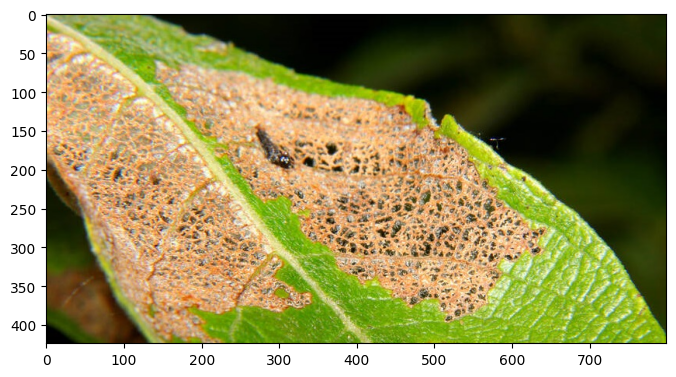

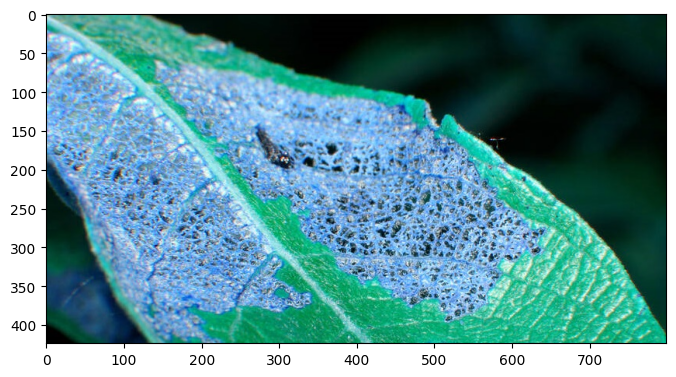

In [32]:
print(data.shape, image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(data)

plt.figure(figsize=(8, 8))
plt.imshow(image)

plt.show()

In [44]:
a=data[:,:,1]
#a= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
a=255-a
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY)[1]
#thresh = cv2.adaptiveThreshold(a,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
#kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [45]:
###### line detection
low_threshold = 50
high_threshold = 150
kernel=5
edges = cv2.Canny(thresh, low_threshold, high_threshold,kernel)
#laplacian = cv2.Laplacian(thresh,cv2.CV_64F)

In [46]:
####### Hough line detection
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 10 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(image) * 0  # creating a blank to draw lines on

In [47]:
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)  

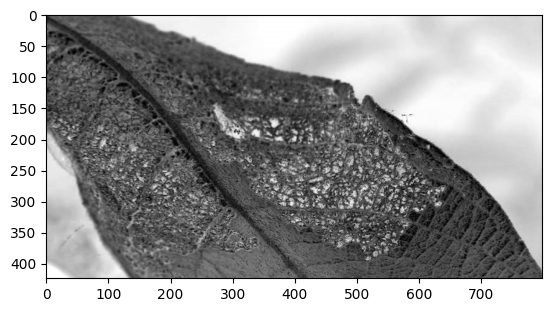

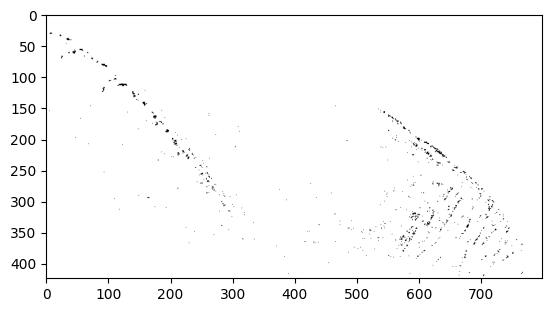

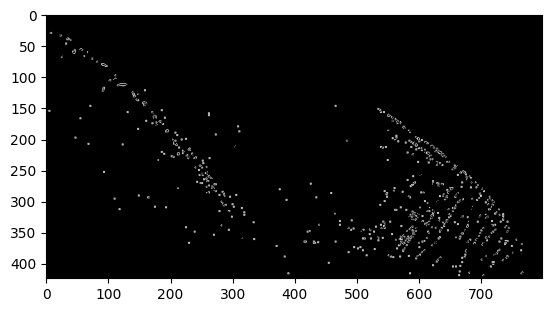

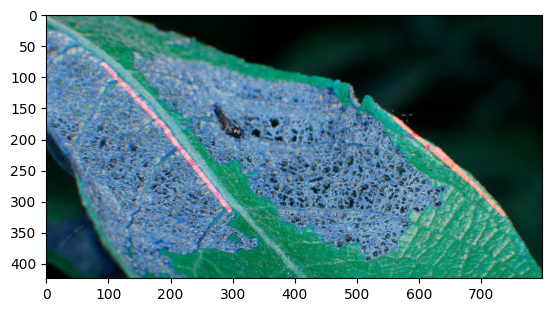

In [48]:
plt.figure()
plt.imshow(a,cmap='gray')
plt.figure()
plt.imshow(thresh,cmap='gray')
plt.figure()
plt.imshow(edges,cmap='gray')

plt.figure()
plt.imshow(lines_edges,cmap='gray')

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x7faf8057df10>)

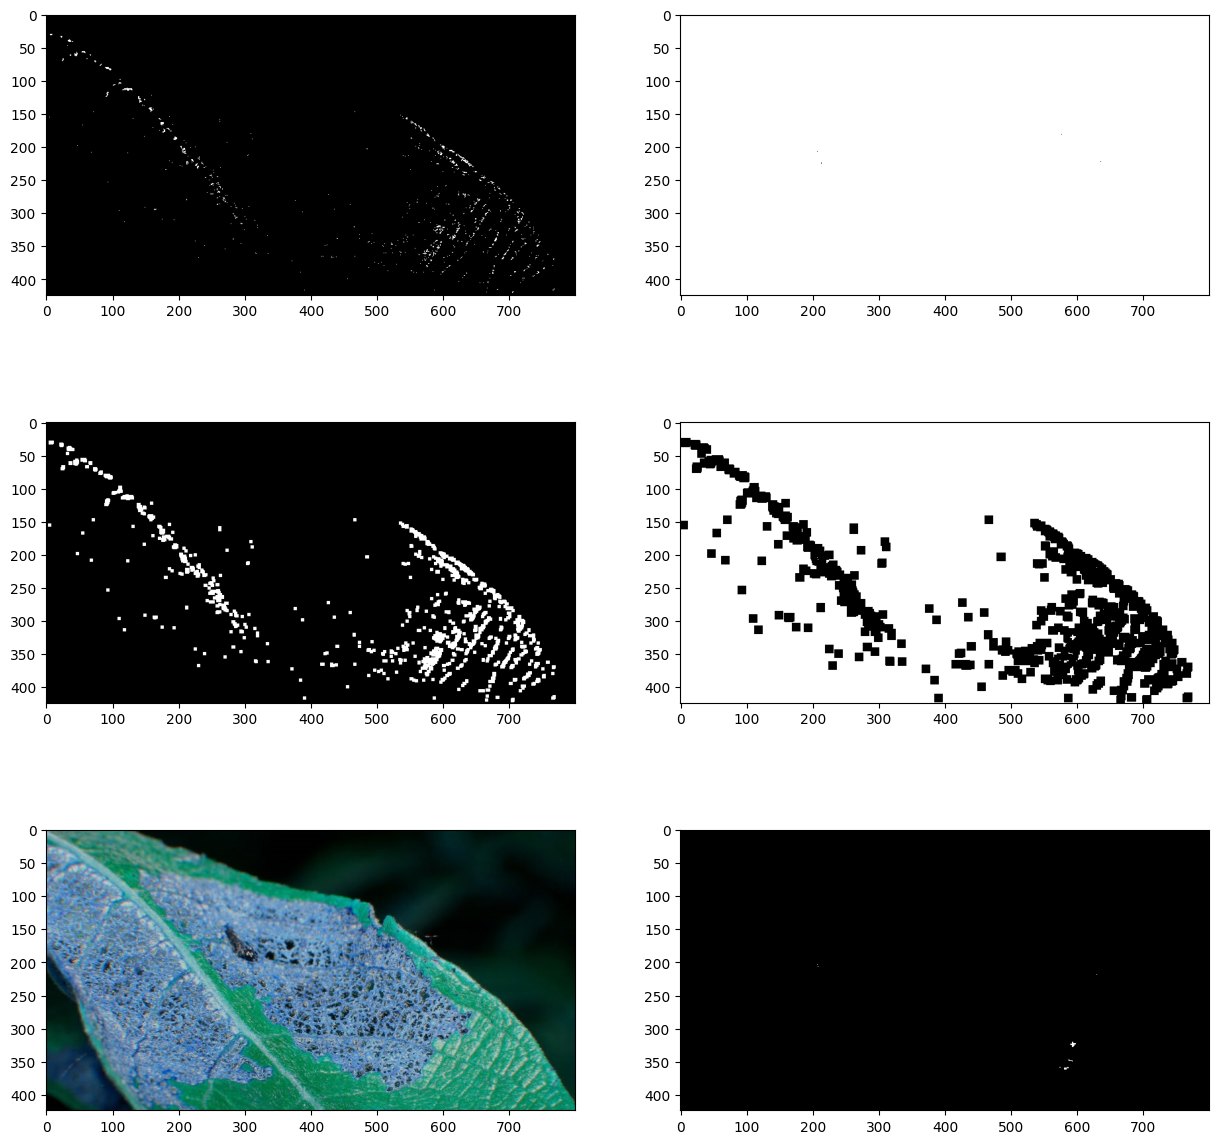

In [50]:
# filling holes
thresh = cv2.threshold(a, 10, 255, cv2.THRESH_BINARY_INV)[1]
im_floodfill = thresh.copy()
h, w = thresh.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255);


final = np.multiply(255-thresh, im_floodfill)
line_image = np.copy(image) * 0
mask = 1 - final
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
final = cv2.morphologyEx(final, cv2.MORPH_DILATE, kernel)
final = np.multiply(mask, final)

mask_dil = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)
mask_erd = cv2.morphologyEx(mask, cv2.MORPH_ERODE, kernel)
bound = mask_dil - mask_erd
bound = cv2.morphologyEx(bound, cv2.MORPH_DILATE, kernel)
bound = 1 - bound
final = np.multiply(bound, final)


# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(final, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in []:
   for x1,y1,x2,y2 in line:
       cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)    
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)  


plt.figure(figsize=(15, 15))
plt.subplot(321), plt.imshow(thresh, cmap='gray')
plt.subplot(322), plt.imshow(im_floodfill, cmap='gray')
plt.subplot(323), plt.imshow(mask, cmap='gray')
plt.subplot(324), plt.imshow(bound, cmap='gray')
plt.subplot(325), plt.imshow(lines_edges, cmap='gray')
plt.subplot(326), plt.imshow(final, cmap='gray')